
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [28]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [29]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


In [30]:
# Load Data to Spark Cluster
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

# Save dataset to a new table in Hive
dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

In [31]:
# Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [32]:
# Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [33]:
# Calculate and display basic statistics for the "medv" column
medv_stats = spark.sql("SELECT mean(medv) AS Mean, stddev(medv) AS StdDev, min(medv) AS Min, max(medv) AS Max FROM bostonh.bos_housing")
medv_stats.show()

+------------------+-----------------+---+----+
|              Mean|           StdDev|Min| Max|
+------------------+-----------------+---+----+
|22.532806324110698|9.197104087379815|5.0|50.0|
+------------------+-----------------+---+----+



In [34]:
# Calculate and display the mean "rm"
mean_rm = spark.sql("SELECT mean(rm) AS Mean_rm FROM bostonh.bos_housing").collect()[0]["Mean_rm"]
print("Mean number of rooms per dwelling (rm):", mean_rm)

Mean number of rooms per dwelling (rm): 6.284634387351787


In [35]:
# Identify the property with the highest crime rate ("crim")
highest_crim_property = spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY crim DESC LIMIT 1")
print("Property with the highest crime rate:")
highest_crim_property.show()

Property with the highest crime rate:
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [36]:
# Find and report the property with the lowest median home value ("medv")
lowest_medv_property = spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY medv ASC LIMIT 1")
print("Property with the lowest median home value:")
lowest_medv_property.show()

Property with the lowest median home value:
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



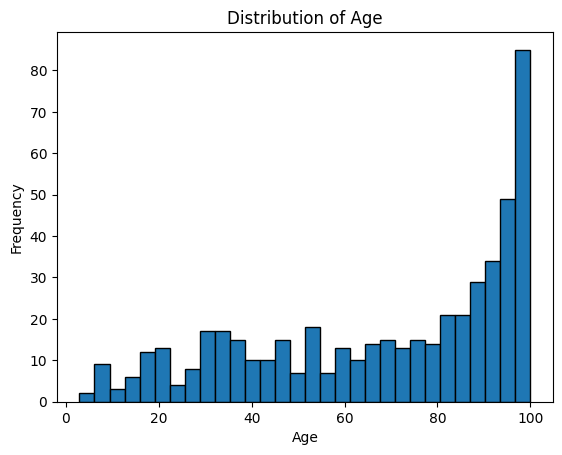

In [37]:
import matplotlib.pyplot as plt

# Create a histogram showing the distribution of the "age" column
age_data = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()
plt.hist(age_data['age'], bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Calculate and report the percentage of properties with a "chas" value of 1
chas_count = spark.sql("SELECT COUNT(*) AS count FROM bostonh.bos_housing WHERE chas = 1").collect()[0]["count"]
percentage_chas = (chas_count / total_records) * 100
print("Percentage of properties with a 'chas' value of 1:", percentage_chas)

Percentage of properties with a 'chas' value of 1: 6.91699604743083


In [39]:
# Calculate the correlation coefficient between "rm" and "medv"
rm_medv_corr = spark.sql("SELECT corr(rm, medv) AS rm_medv_corr FROM bostonh.bos_housing").collect()[0]["rm_medv_corr"]
print("Correlation between 'rm' and 'medv':", rm_medv_corr)

Correlation between 'rm' and 'medv': 0.6953599470715401


In [40]:
# Calculate the correlation coefficient between "ptratio" and "nox"
ptratio_nox_corr = spark.sql("SELECT corr(ptratio, nox) AS ptratio_nox_corr FROM bostonh.bos_housing").collect()[0]["ptratio_nox_corr"]
print("Correlation between 'ptratio' and 'nox':", ptratio_nox_corr)

Correlation between 'ptratio' and 'nox': 0.18893267711276893


In [41]:
# Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv")
top5_neighborhoods = spark.sql("SELECT zn AS Neighborhood, medv FROM bostonh.bos_housing ORDER BY medv DESC LIMIT 5")
print("Top 5 neighborhoods with the highest median home values:")
top5_neighborhoods.show()

Top 5 neighborhoods with the highest median home values:
+------------+----+
|Neighborhood|medv|
+------------+----+
|         0.0|50.0|
|        80.0|50.0|
|         0.0|50.0|
|         0.0|50.0|
|         0.0|50.0|
+------------+----+



In [42]:
# Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0
avg_age_chas1 = spark.sql("SELECT avg(age) AS Avg_Age FROM bostonh.bos_housing WHERE chas = 1").collect()[0]["Avg_Age"]
avg_age_chas0 = spark.sql("SELECT avg(age) AS Avg_Age FROM bostonh.bos_housing WHERE chas = 0").collect()[0]["Avg_Age"]
print("Average property age for neighborhoods with 'chas' value of 1:", avg_age_chas1)
print("Average property age for neighborhoods with 'chas' value of 0:", avg_age_chas0)

Average property age for neighborhoods with 'chas' value of 1: 77.50000000000001
Average property age for neighborhoods with 'chas' value of 0: 67.91167728237794


In [43]:
# Create a Hive view named "property_age_view" that includes the "age" and "medv" columns
spark.sql("CREATE OR REPLACE VIEW property_age_view AS SELECT age, medv FROM bostonh.bos_housing")

DataFrame[]

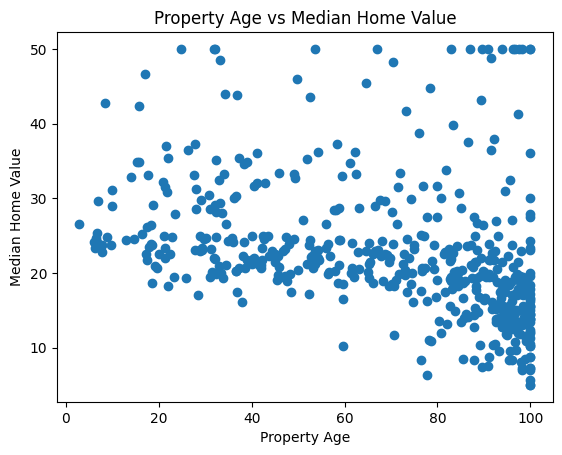

In [44]:
# Load the view into a dataframe
df = spark.sql("SELECT * FROM property_age_view").toPandas()

# Plot a scatter plot of property age against median home value
plt.scatter(df['age'], df['medv'])
plt.title('Property Age vs Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.show()

In [45]:
# Write a query to identify and report properties with a "crim" value greater than 10
outliers = spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim > 10")
print("Properties with 'crim' value greater than 10:")
outliers.show()


Properties with 'crim' value greater than 10:
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|

In [46]:
# As for the significance of detecting outliers in data analysis, outliers can greatly affect the results of the data analysis and statistical modeling.
# They can cause serious problems in statistical analyses. Outliers can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models,
# and ultimately poorer results. They can also indicate data points that belong to different systems or that result from measurement errors. Therefore, it’s important to detect and properly handle outliers
# in the dataset. However, not all outliers are bad and their detection often requires a good understanding of the data. In some cases, outliers can be an error, but in others, they can be useful to understand
# and explain phenomena that are not “standard”. So, it’s always important to investigate the nature of the outliers before deciding how to handle them.

In [47]:
# Hypothesis:

# Null Hypothesis (H0): There is no relationship between the average number of rooms and the median home value.
# Alternative Hypothesis (H1): There is a significant relationship between the average number of rooms and the median home value.

# If the correlation coefficient is significantly different from 0, we reject the null hypothesis and conclude that there is a significant relationship between the average number of rooms and the median home value.

In [48]:
# Calculate the correlation coefficient between "rm" and "medv"
rm_medv_corr = spark.sql("SELECT corr(rm, medv) AS rm_medv_corr FROM bostonh.bos_housing").collect()[0]["rm_medv_corr"]
print("Correlation between 'rm' and 'medv':", rm_medv_corr)

Correlation between 'rm' and 'medv': 0.6953599470715401
